In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tit_df=pd.read_csv('titanic_dataset.csv')
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tit_df.shape

(891, 12)

2. Make ‘PassengerId’ as the index column

In [8]:
tit_df.set_index('PassengerId')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset


In [9]:
tit_df.shape

(891, 12)

In [10]:
tit_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
tit_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
tit_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

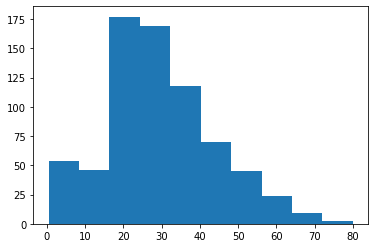

In [21]:
plt.hist(tit_df['Age'])
plt.show()

In [ ]:
# the above graph shows, ages of  most of the passngers were in between 18-30

In [8]:
tit_df.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

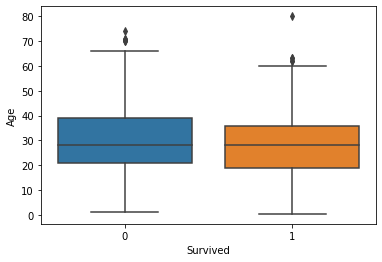

In [7]:
sns.boxplot(x="Survived", y="Age", data=tit_df)

plt.show()

In [ ]:
4.Fill in all the missing values present in all the columns in the dataset

([<matplotlib.axis.XTick at 0x19f5def6c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

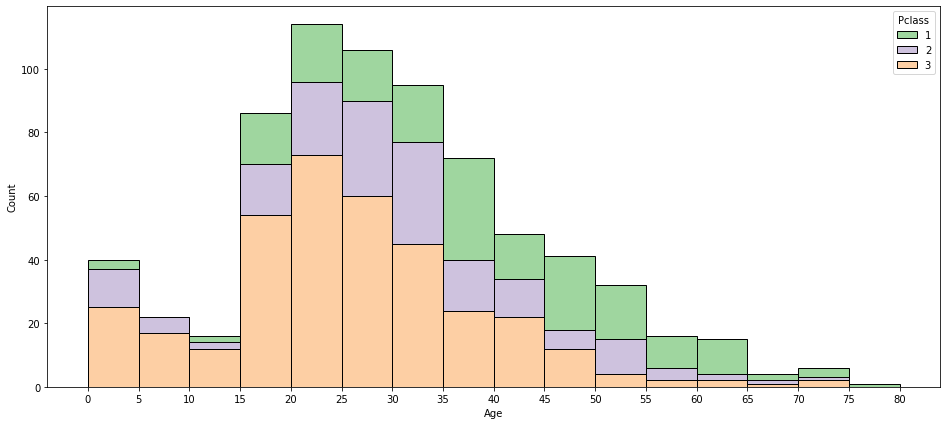

In [5]:
#Age column:

plt.figure(figsize=(16,7))
sns.histplot(x='Age',data=tit_df,bins=np.arange(0,85,5),hue='Pclass',palette='Accent',multiple='stack')
plt.xticks(np.arange(0,85,5))
    
    

In [6]:
tit_df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [10]:
tit_df['Age']=tit_df.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

tit_df.isnull().sum()

In [17]:
#Fill Cabin column
#The feature Cabin has 687 null values out of 891 rows in the datset,so here we are dropping the Cabin Column

tit_df.drop(['Ticket', 'Cabin'],axis=1,inplace=True) #droppig the column ticket as it does not contribute to our target class

In [20]:
# Filling the missing values in Embarked Column

tit_df.loc[tit_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


These are the 2 null values in Embarked, we can use https://www.encyclopedia-titanica.org/ to look up the details of passengers.
Here both these passengers have embarked from Southhampton

In [21]:
tit_df=tit_df.fillna({'Embarked':'S'},limit=2)

In [22]:
tit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

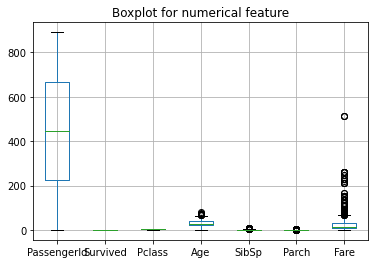

In [35]:
numerical_data=tit_df.select_dtypes(exclude="object")

#Check for the outliers
numerical_data.boxplot()
plt.title("Boxplot for numerical feature")
numerical_data.columns

<AxesSubplot:>

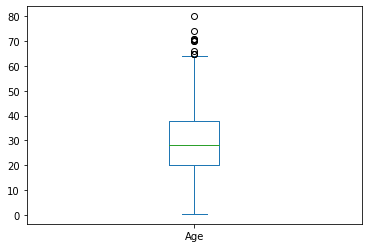

In [41]:
# Handling of Outliers
#1. Handling of outliers in Age
cols=['Age', 'SibSp', 'Parch']
# Calculating the IQR value "Age" and setting the lower & upper limit for the outliers
Q1=np.percentile(tit_df["Age"],25,interpolation="midpoint")
Q2=np.percentile(tit_df["Age"],50,interpolation="midpoint")
Q3=np.percentile(tit_df["Age"],75,interpolation="midpoint")

IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

tit_df.loc[tit_df["Age"] <low_lim,"Age"] = low_lim
tit_df.loc[tit_df["Age"] >up_lim,"Age"] = up_lim

tit_df['Age'].plot(kind ='box')

<AxesSubplot:>

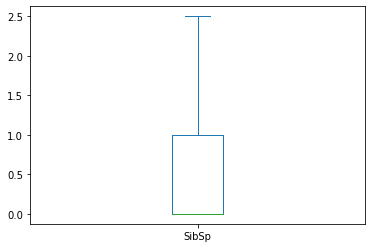

In [40]:
# 2. Handling of outliers in SibSp
# Calculating the IQR value "SibSp" and setting the lower & upper limit for the outliers
Q1=np.percentile(tit_df["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(tit_df["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(tit_df["SibSp"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

tit_df.loc[tit_df["SibSp"] <low_lim,"SibSp"] = low_lim
tit_df.loc[tit_df["SibSp"] >up_lim,"SibSp"] = up_lim

tit_df['SibSp'].plot(kind ='box')

<AxesSubplot:>

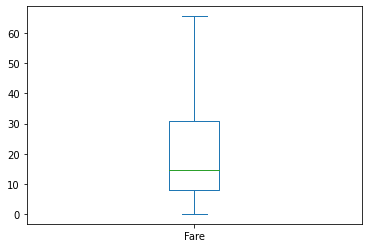

In [43]:
# 3. Handling of outliers in Fare
# Calculating the IQR value "Fare" and setting the lower & upper limit for the outliers
Q1=np.percentile(tit_df["Fare"],25,interpolation="midpoint")
Q2=np.percentile(tit_df["Fare"],50,interpolation="midpoint")
Q3=np.percentile(tit_df["Fare"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

# Replacing outlier with its lower & upper limits

tit_df.loc[tit_df["Fare"] <low_lim,"Fare"] = low_lim
tit_df.loc[tit_df["Fare"] >up_lim,"Fare"] = up_lim


tit_df['Fare'].plot(kind ='box')


<AxesSubplot:>

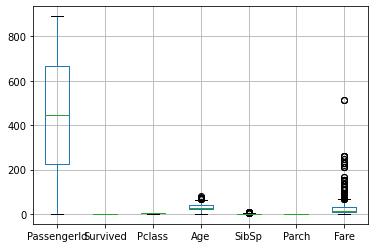

6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [44]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [50]:
tit_df["Sex"]=pd.get_dummies(tit_df["Sex"],drop_first=True)
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,0,0,1


In [23]:
#Droppig the column -'name'
tit_df.drop(['Name'],axis=1,inplace=True)

In [24]:
tit_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,21.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


One Hot Encode the Categorical columns

In [26]:
sex=pd.get_dummies(tit_df['Sex'],drop_first=True)
embarked=pd.get_dummies(tit_df['Embarked'],drop_first=True)

tit_df.drop(['Sex','Embarked'],axis=1,inplace=True)
tit_df=pd.concat([tit_df,sex,embarked],axis=1)

In [29]:
tit_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,21.5,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


# Splitting the dataset to test and train

In [30]:
from sklearn.model_selection import train_test_split

X=tit_df.drop('Survived',axis=1)
y=tit_df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Min Max Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


temp=X_train
temp=pd.DataFrame(temp)

In [32]:
temp

,0,1,2,3,4,5,6,7,8
0,0.371910,0.0,0.566474,0.000,0.000000,0.055628,1.0,0.0,1.0
1,0.823596,0.5,0.283740,0.000,0.000000,0.025374,1.0,0.0,1.0
2,0.429213,1.0,0.396833,0.000,0.000000,0.015469,1.0,0.0,1.0
3,0.791011,1.0,0.321438,0.125,0.000000,0.015330,1.0,0.0,1.0
4,0.913483,1.0,0.070118,0.500,0.333333,0.061045,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,0.119101,1.0,0.258608,0.000,0.000000,0.014932,0.0,0.0,1.0
708,0.303371,0.0,0.497361,0.000,0.000000,0.060508,1.0,0.0,1.0
709,0.966292,1.0,0.509927,0.250,0.000000,0.027538,1.0,0.0,1.0
710,0.488764,0.0,0.170646,0.125,0.333333,0.234224,0.0,0.0,1.0


# LogisticRegression  Model

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions=lr.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
print("MSE is :" , mean_squared_error(y_test,lr_predictions))

MSE is : 0.2011173184357542


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,lr_predictions))
print(confusion_matrix(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[89 16]
 [20 54]]


# RandomForest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_predictions=random_forest.predict(X_test)

print("MSE is :" , mean_squared_error(y_test,random_forest_predictions))

MSE is : 0.18994413407821228


In [38]:
print(classification_report(y_test,random_forest_predictions))
print(confusion_matrix(y_test,random_forest_predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[91 14]
 [20 54]]


# Linear support Vectort

In [39]:
from sklearn.svm import SVC,LinearSVC

linear_svc=LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_predictions=linear_svc.predict(X_test)

print("MSE is :" , mean_squared_error(y_test,linear_svc_predictions))


MSE is : 0.19553072625698323


In [41]:
print(classification_report(y_test,linear_svc_predictions))
print(confusion_matrix(y_test,linear_svc_predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[91 14]
 [21 53]]


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_predictions=linear_svc.predict(X_test)

print("MSE is :" , mean_squared_error(y_test,dec_tree_predictions))


MSE is : 0.19553072625698323


In [44]:
print(classification_report(y_test,dec_tree_predictions))
print(confusion_matrix(y_test,dec_tree_predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[91 14]
 [21 53]]


# K Nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

acc_values=[]
neighbours=np.arange(1,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model=classifier.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
acc_values

[0.7653631284916201,
 0.7541899441340782,
 0.7653631284916201,
 0.7988826815642458,
 0.7988826815642458,
 0.7877094972067039,
 0.8044692737430168,
 0.8044692737430168,
 0.8212290502793296,
 0.8156424581005587,
 0.8044692737430168,
 0.8044692737430168,
 0.7988826815642458,
 0.7988826815642458]

Text(0, 0.5, 'accuracy value')

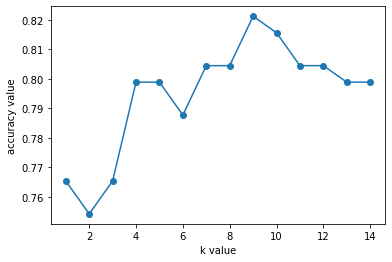

In [57]:
plt.plot(neighbours,acc_values,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy value")

In [54]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
model=classifier.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [55]:
print("accuracy_score is",  accuracy_score(y_test,y_predict) )
print("precision_score is" ,precision_score(y_test,y_predict) )
print("recall_score is" ,recall_score(y_test,y_predict) )
print("f1_score is" ,f1_score(y_test,y_predict) )
print("MSE is :" , mean_squared_error(y_test,y_predict))

accuracy_score is 0.8212290502793296
precision_score is 0.8387096774193549
recall_score is 0.7027027027027027
f1_score is 0.7647058823529411
MSE is : 0.1787709497206704


# Gaussian Naive Bayers

In [58]:
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB()
gaussian.fit(X_train, y_train)
g_predictions=gaussian.predict(X_test)

print("MSE is :" , mean_squared_error(y_test,g_predictions))


MSE is : 0.22905027932960895


In [60]:
print(classification_report(y_test,g_predictions))
print(confusion_matrix(y_test,g_predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

[[84 21]
 [20 54]]


# Best Model:

In [ ]:
We can see, the Random Forest Classifre goes on the first.